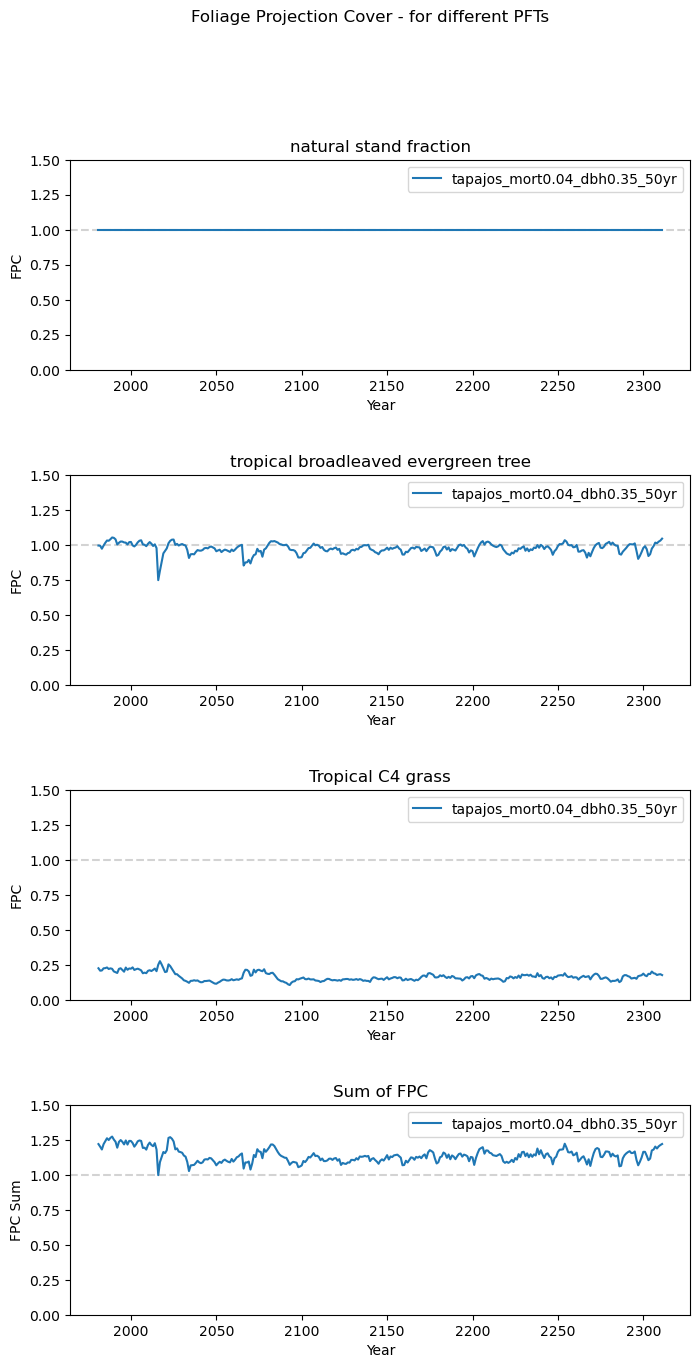

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import os
import numpy as np
import rasterio
import pandas as pd
import nc_time_axis

# set path to output files 
path = '//clusterfs/biodiversity/annavo/LPJmL56Fit/'

# PATH NEEDS TO BE CHECKED
path_validation_data = '//clusterfs/biodiversity/bereswil/Documents/Validation_Data'

# Climate and precipitation data
 
runs = ['tapajos_mort0.04_dbh0.35_50yr']


output_files_fpc = {'fpc.nc': 'FPC'}
output_files_fpc_PFT = ["natural stand fraction", "tropical broadleaved evergreen tree", "Tropical C4 grass"]

# Create figure and subplots
fig, axs = plt.subplots(len(output_files_fpc_PFT)+1, 1, figsize=(8, 15))

# Set common y-axis limits and dashed line at y=1
for ax in axs:
    ax.set_ylim(0, 1.5)
    ax.axhline(1, linestyle='--', color='lightgray')

# Loop through output files
for i, file in enumerate(output_files_fpc_PFT):
    # Loop through runs and plot data
    for j, run in enumerate(runs):
        # Open file
        ds = xr.open_dataset(os.path.join(path, run, 'output', 'fpc.nc'))
        fpc = ds.variables['FPC'][:, i, 0, 0]  # Extract FPC values for the current PFT

        # Plot FPC values
        axs[i].plot(ds['time'], fpc, label=run)

    # Set title and legend for subplot
    axs[i].set_title(output_files_fpc_PFT[i])
    axs[i].legend()

    # Set axis labels for subplot
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('FPC')
    #axs[i].set_ylim(0,1.2)

# Sum FPC values for tropical broadleaved evergreen tree and tropical C4 grass for each run
for j, run in enumerate(runs):
    fpc_sum = 0
    for i, pft in enumerate(output_files_fpc_PFT):
        if pft in ["tropical broadleaved evergreen tree", "Tropical C4 grass"]:
            ds = xr.open_dataset(os.path.join(path, run, 'output', 'fpc.nc'))
            fpc_sum += ds.variables['FPC'][:, i, 0, 0]
    axs[-1].plot(ds['time'], fpc_sum, label=run)

# Set title and legend for the sum plot
axs[-1].set_title('Sum of FPC')
axs[-1].legend()

# Set axis labels for the sum plot
axs[-1].set_xlabel('Year')
axs[-1].set_ylabel('FPC Sum')
#axs[-1].set_ylim(0,1.2)


# Set overall title for figure
fig.suptitle('Foliage Projection Cover - for different PFTs')

# Adjust spacing and display plot
plt.subplots_adjust(hspace=0.5)
plt.show()